Import the Dataset

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Choosing the Right Metrics

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


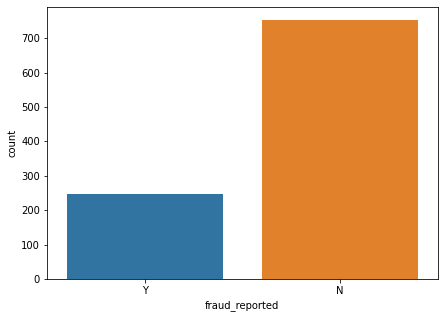

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(df['fraud_reported'])

EXPLORATORY DATA ANALYSIS (EDA)

FRAUD REPORTED dependence on categorical features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if sys.path[0] == '':


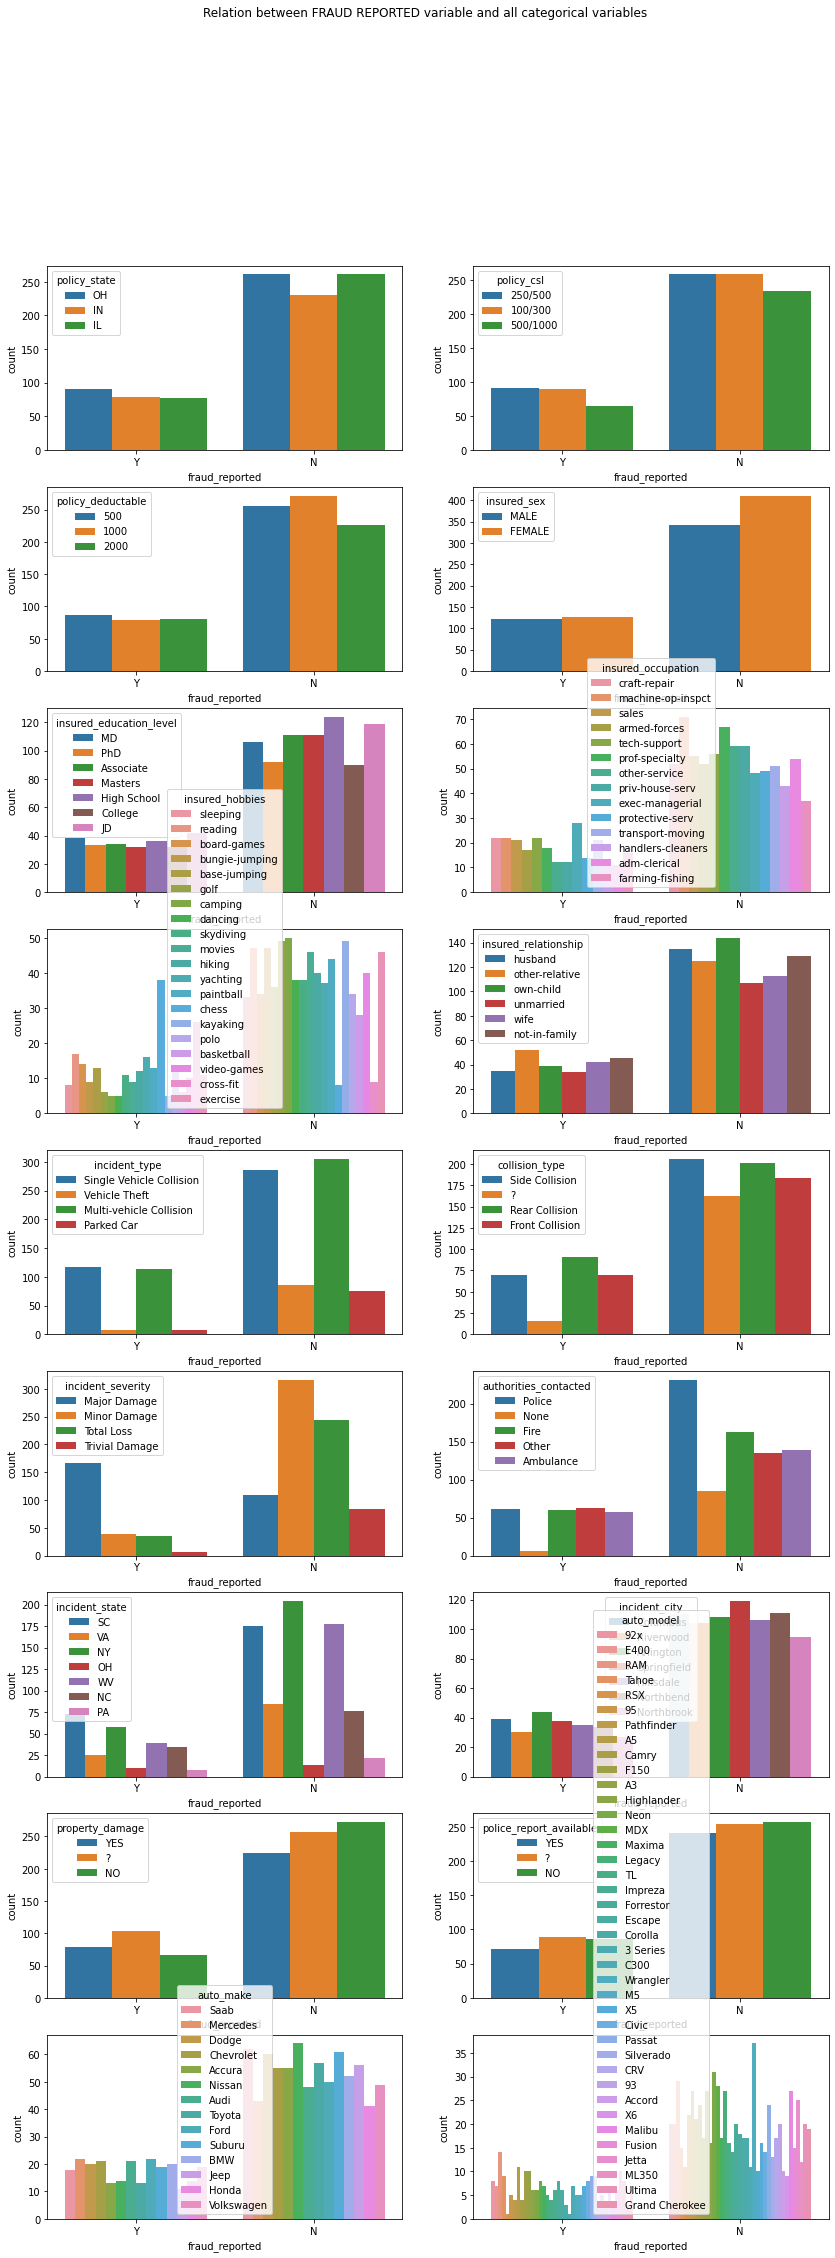

In [6]:
cols = ['policy_state', 'policy_csl', 'policy_deductable', 'insured_sex', 
'insured_education_level', 'insured_occupation', 'insured_hobbies', 
'insured_relationship', 'incident_type', 'collision_type', 
'incident_severity', 'authorities_contacted', 'incident_state', 
'incident_city', 'property_damage', 
'police_report_available', 'auto_make', 'auto_model']
fig = plt.figure(figsize=(14,40))
for c,i in zip(cols, range(1,20)):
    ax = fig.add_subplot(10,2,i)
    sns.countplot(x='fraud_reported',hue=c, data=df)
fig.suptitle('Relation between FRAUD REPORTED variable and all categorical variables',y=0.97)
fig.tight_layout(pad=4.0)

FRAUD REPORTED dependence on numerical features

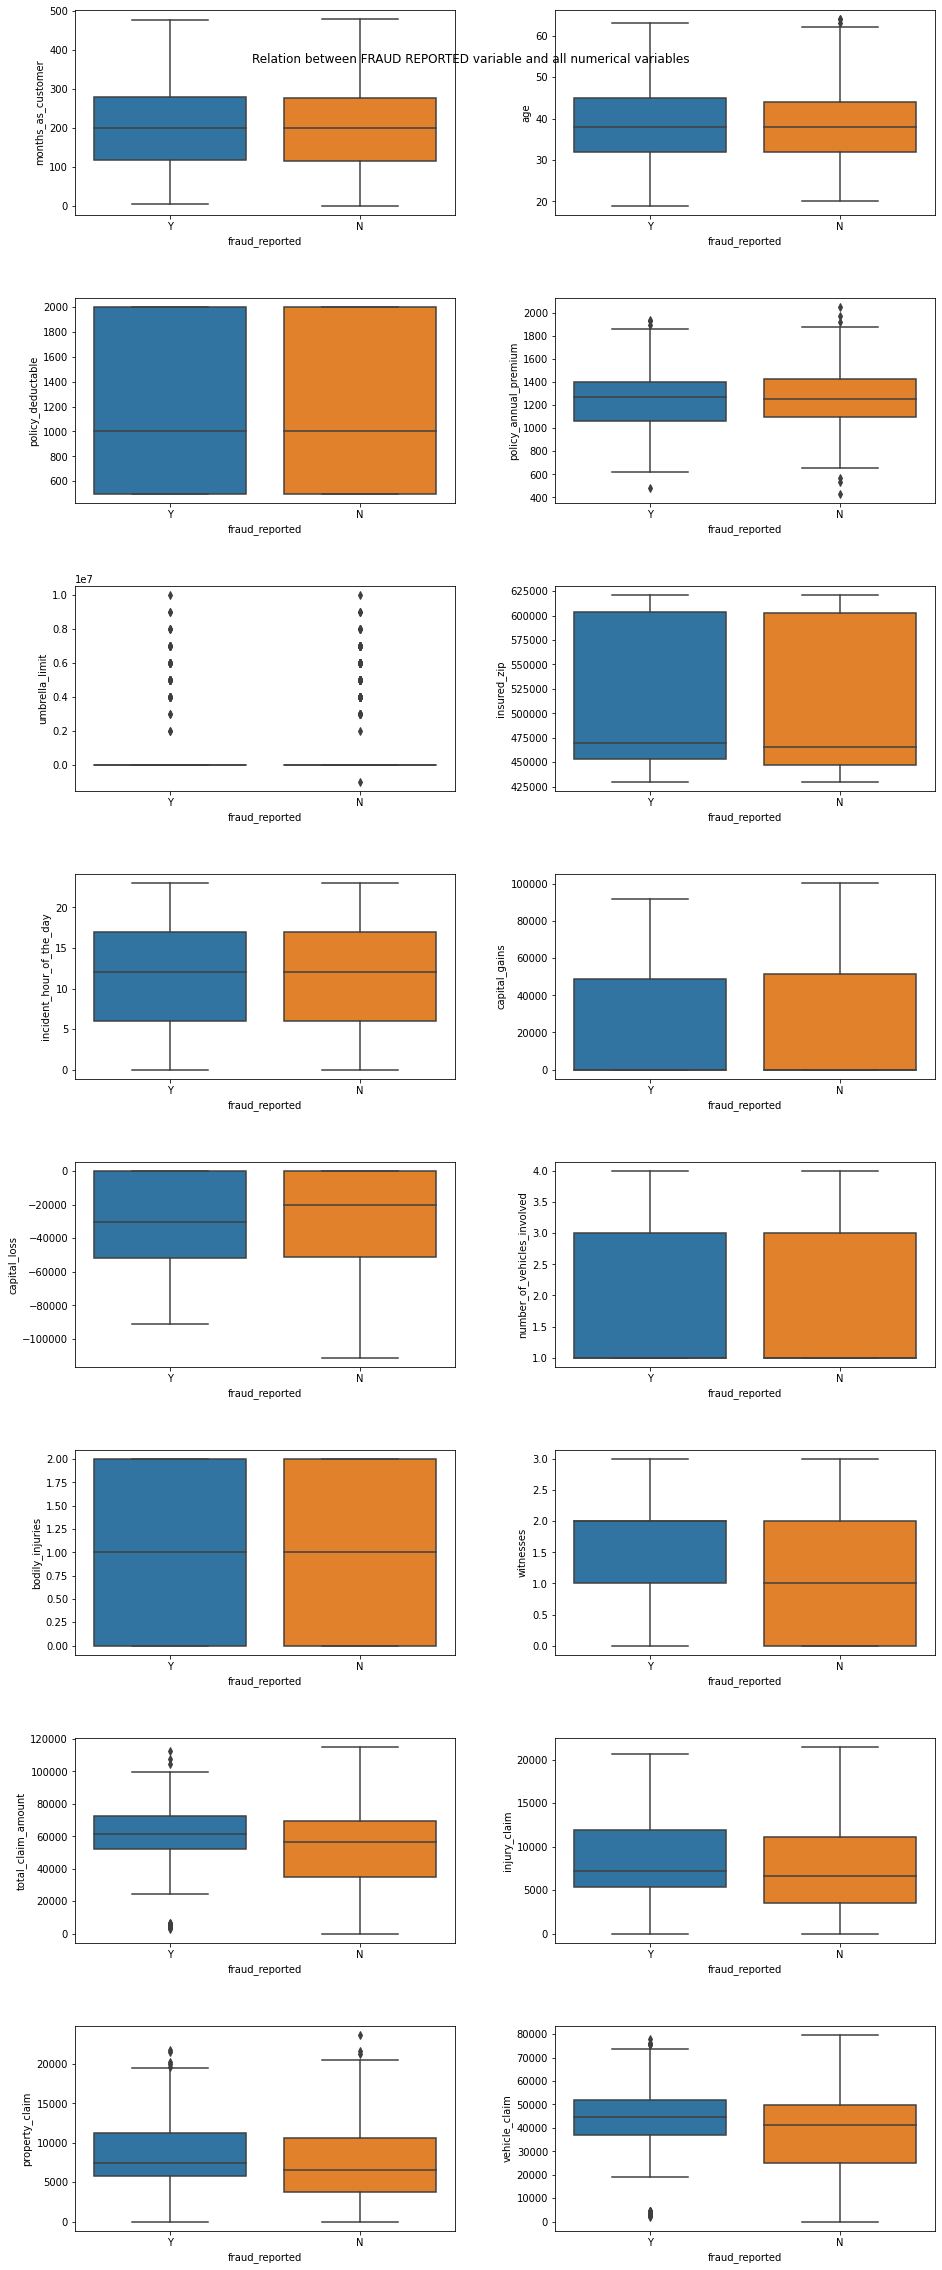

In [7]:
cols = ['months_as_customer', 'age',
'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
'insured_zip', 'incident_hour_of_the_day', 'capital_gains', 'capital_loss',
'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
'total_claim_amount', 'injury_claim', 'property_claim',
'vehicle_claim']
fig = plt.figure(figsize=(14,40))
for c,i in zip(cols, range(1,20)):
    ax = fig.add_subplot(10,2,i)
    sns.boxplot(x='fraud_reported', y=c, data=df)
fig.suptitle('Relation between FRAUD REPORTED variable and all numerical variables',y=0.97)
fig.tight_layout(pad=4.0)

Relation between several variables

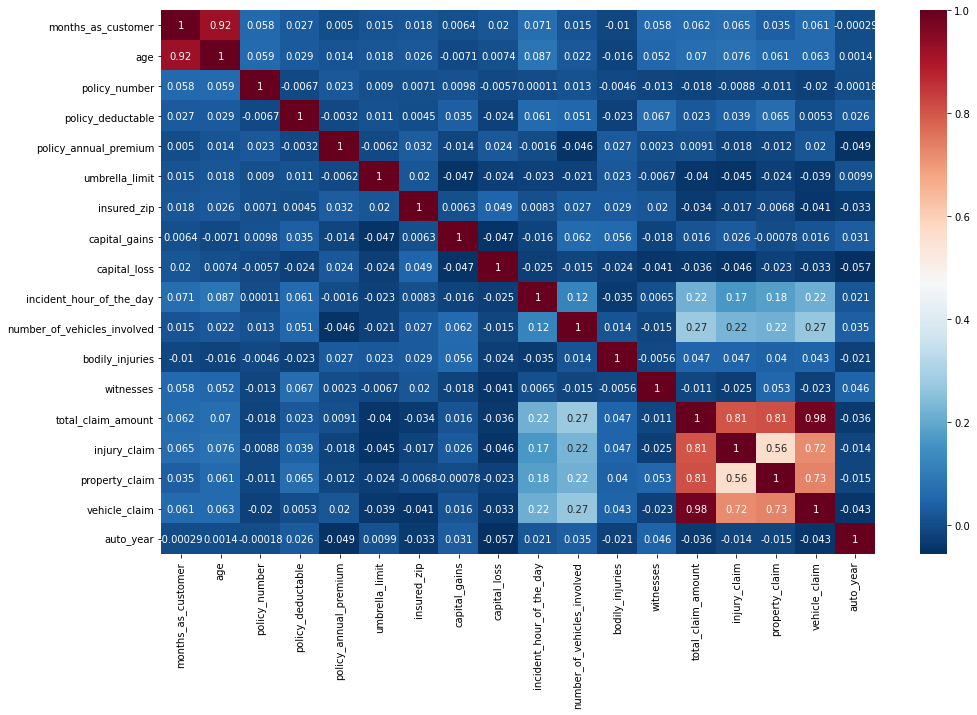

In [8]:
plt.rcParams['figure.figsize'] = [16, 10]
sns.heatmap(df.corr(), annot=True , cmap = 'RdBu_r')

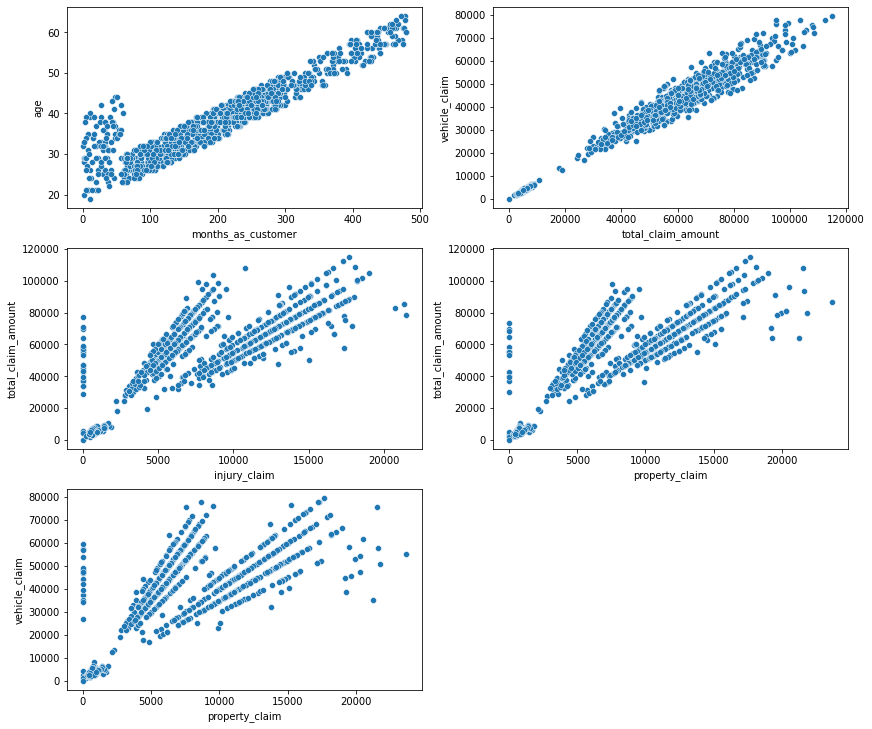

In [9]:
fig = plt.figure(figsize=(14,17))
fig.add_subplot(4,2,1)
sns.scatterplot(x='months_as_customer',y='age',data=df)
fig.add_subplot(4,2,2)
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',data=df)
fig.add_subplot(4,2,3)
sns.scatterplot(x='injury_claim',y='total_claim_amount',data=df)
fig.add_subplot(4,2,4)
sns.scatterplot(x='property_claim',y='total_claim_amount',data=df)
fig.add_subplot(4,2,5)
sns.scatterplot(x='property_claim',y='vehicle_claim',data=df)

SIMPLE Transformation

In [10]:
df['cap_loss'] = df['capital_loss']/(-1)
df.drop(columns=['capital_loss'])

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,cap_loss
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,-0.0
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,-0.0
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,-0.0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,62400.0
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,46000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,-0.0
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,-0.0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,-0.0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,-0.0


HANDLING THE MISSING DATA

In [11]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

**DATA PREPARATION**

In [82]:
#dataset
cols = ['policy_state', 'policy_csl', 'policy_deductable', 'insured_sex', 
'insured_education_level', 'insured_occupation', 'insured_hobbies', 
'insured_relationship', 'incident_type', 'collision_type', 
'incident_severity', 'authorities_contacted', 'incident_state', 
'incident_city', 'property_damage', 
'police_report_available', 'auto_make', 'auto_model']
data = df.drop(columns=['policy_number', 'policy_bind_date', 'incident_date', 'incident_location'])

#one hot encoding
data = pd.concat([data,pd.get_dummies(data[cols])],axis=1)
data = data.drop(columns=cols)
X = data.drop('fraud_reported',axis=1)
yi = data['fraud_reported']

#onehotencodingforlabelvariable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(yi)

[1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 

**Splitting Dataset Into Training Set and Test Set**

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

**USING TRAIN SET**

In [84]:
print('Number of features: %d' %(len(X_train.columns)))

Number of features: 162


Text(0.5, 1.0, 'Feature importance score by Random Forest')

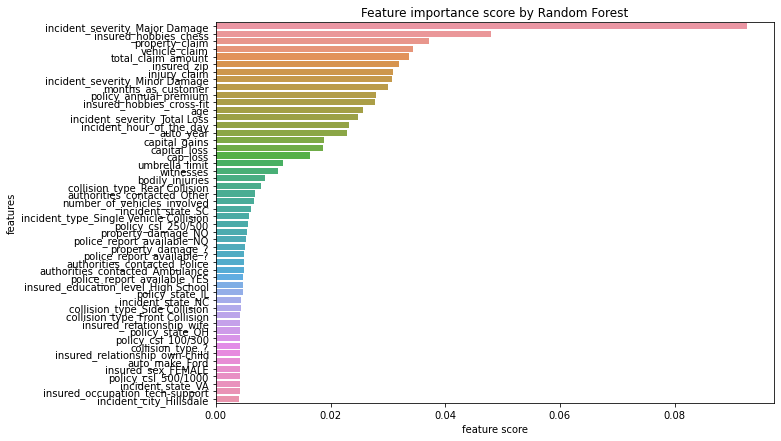

In [85]:
#feature importance scoring by using Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0,n_jobs=4)
forest.fit(X_train, y_train)
indices = np.argsort(forest.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(forest.feature_importances_),'features':Series(X_train.columns)})   

#plot top 15 important features
plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(50))
plt.title('Feature importance score by Random Forest')

Select top 50 features to be involved

Using Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#select only top 50 important features
new_col = np.array(Series(X_train.columns[indices]).head(50))
X_train_new = X_train[new_col]

#make pipeline with scaler
pipe = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression(random_state=0))])
param_grid = {'logreg__C': [10, 11, 12]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#begin grid-searching for hyperparameters tuning
grid_logreg = GridSearchCV(pipe, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_logreg.fit(X_train_new,y_train)

print('Best hyperparameter: ', grid_logreg.best_params_)
print('Best cross validation score: ', grid_logreg.best_score_)

Best hyperparameter:  {'logreg__C': 11}
Best cross validation score:  0.8763589301121657


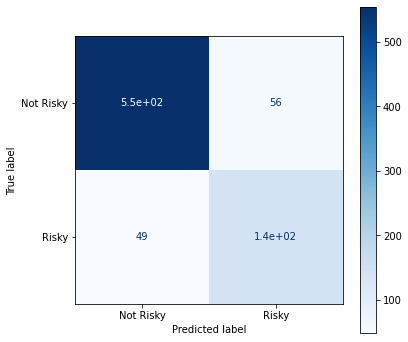

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_logreg, X_train_new, y_train, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

**XGBoost**

Text(0.5, 1.0, 'Feature importance score by XGBoost')

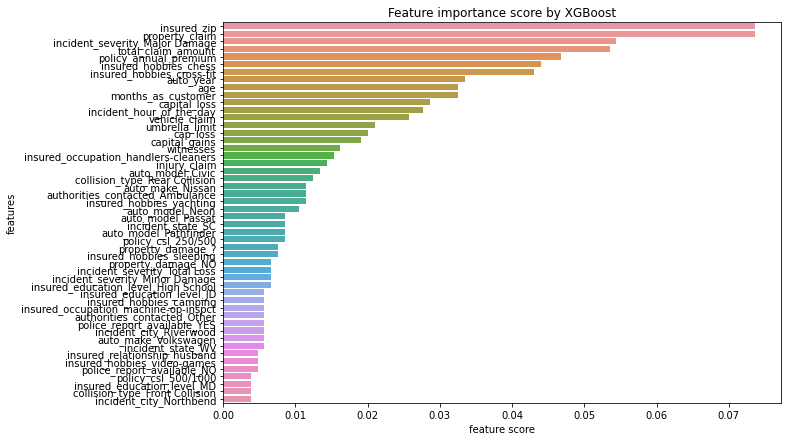

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, n_estimators=300, colsample_bytree=0.3, gamma=1, n_jobs=4, max_depth=3, learning_rate=0.1,
                   importance_type='weight')
xgb.fit(X_train,y_train)
indices = np.argsort(xgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(xgb.feature_importances_),'features':Series(X_train.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(50))
plt.title('Feature importance score by XGBoost')

In [89]:
#select only top 50 important features
new_col = np.array(Series(X_train.columns[indices]).head(50))
X_train_new = X_train[new_col]

#build model and tune it
xgb = XGBClassifier(random_state=0, learning_rate=0.1, gamma=1, n_jobs=4)
param_grid = {'n_estimators' : [200, 250], 'max_depth' : [3, 4], 'colsample_bytree' : [0.3, 0.4]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_xgb.fit(X_train_new,y_train)
print('Best hyperparameter: ', grid_xgb.best_params_)
print('Best cross validation score: ', grid_xgb.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.4, 'max_depth': 4, 'n_estimators': 250}
Best cross validation score:  0.8835634167385678


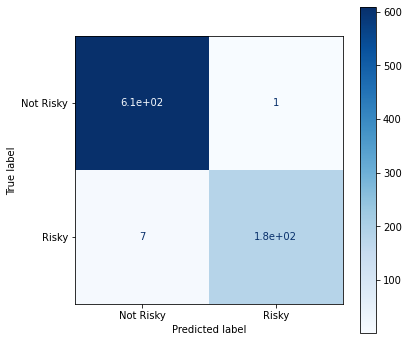

In [90]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_xgb, X_train_new, y_train, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

**LightGBM**

Text(0.5, 1.0, 'Feature importance score by LightGBM')

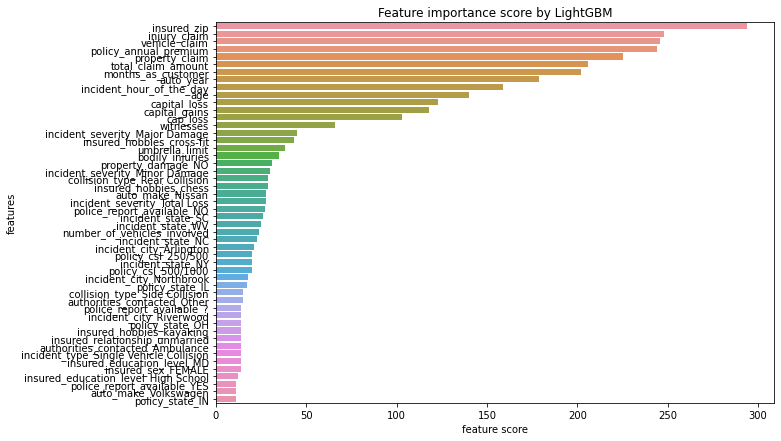

In [91]:
import re
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05, n_estimators=200, colsample_bytree=0.2, reg_lambda=5)
lgb.fit(X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y_train)
indices = np.argsort(lgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(lgb.feature_importances_),'features':Series(X_train.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(50))
plt.title('Feature importance score by LightGBM')

In [92]:
#select only top 50 important features
new_col = np.array(Series(X_train.columns[indices]).head(50))
X_train_new = X_train[new_col]

#build model and tune it
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05)
param_grid = {'n_estimators' : [200, 250], 'reg_lambda' : [40, 50, 60], 'colsample_bytree' : [0.3, 0.4]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_lgb.fit(X_train_new.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y_train)
print('Best hyperparameter: ', grid_lgb.best_params_)
print('Best cross validation score: ', grid_lgb.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.4, 'n_estimators': 250, 'reg_lambda': 40}
Best cross validation score:  0.8679465056082829


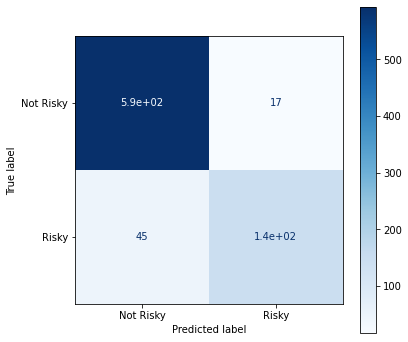

In [93]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_lgb, X_train_new, y_train, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

**RISK RANKING**

In [94]:
probs = Series(grid_lgb.predict_proba(X_train_new)[:,1])
rank = df['policy_number']
rank = pd.concat([rank,probs],axis=1)
rank_train = rank.rename(columns={0 : "PROBABILITY"})
rank_train = rank_train.sort_values(by='PROBABILITY', ascending=False)
rank_train = rank_train.set_index(Series([x for x in range(1,len(rank)+1)]))
rank_train

,policy_number,PROBABILITY
1,480094,0.864661
2,442795,0.848021
3,367455,0.839907
4,944102,0.833470
5,411289,0.821697
...,...,...
996,941851,NaN
997,186934,NaN
998,918516,NaN
999,533940,NaN


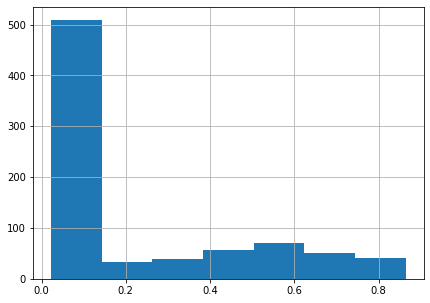

In [95]:
plt.figure(figsize=(7,5))
rank_train['PROBABILITY'].hist(bins=7)

**Testing the Model by USING Test Set**

In [96]:
X_test

,months_as_customer,age,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,cap_loss,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,...,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
993,124,28,1235.14,0,443567,0,-32100,20,3,0,1,60200,6020,6020,48160,2012,32100.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
859,130,30,1193.40,0,461372,0,-40800,16,3,2,3,48950,8900,4450,35600,2005,40800.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,194,35,1416.24,0,441659,0,0,7,1,1,0,5940,1080,540,4320,2003,-0.0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
553,428,53,1496.44,0,616884,0,0,9,1,2,2,6930,630,1260,5040,2013,-0.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
672,61,25,988.06,0,460579,0,0,1,3,1,0,32320,4040,4040,24240,2000,-0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,148,30,1471.24,0,601574,57500,-93600,4,3,2,2,32480,4060,4060,24360,1997,93600.0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
722,269,41,1422.21,0,620507,0,-46400,21,1,2,1,85900,17180,17180,51540,2005,46400.0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
215,272,43,1279.13,0,615226,0,0,5,3,1,2,81070,7370,14740,58960,2006,-0.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
653,109,29,1007.28,6000000,457727,0,0,17,3,1,3,91080,16560,16560,57960,1995,-0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
nas = X_test.isna().sum()
nas

months_as_customer       0
age                      0
policy_annual_premium    0
umbrella_limit           0
insured_zip              0
                        ..
auto_model_Tahoe         0
auto_model_Ultima        0
auto_model_Wrangler      0
auto_model_X5            0
auto_model_X6            0
Length: 162, dtype: int64

In [98]:
#use best LightGBM model with tuned hyperparameters
#select only top 50 important features
from sklearn.metrics import roc_auc_score
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05, n_estimators=200, colsample_bytree=0.4, reg_lambda=50)
lgb.fit(X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y_train)
indices = np.argsort(lgb.feature_importances_)[::-1]
new_col = np.array(Series(X_train.columns[indices]).head(50))
X_test_new = X_test[new_col]

#implement the model and see the result
score = roc_auc_score(y_test, grid_lgb.predict_proba(X_test_new)[:, 1])
print('Test data AUC score: ', score)

Test data AUC score:  0.5607900871058766


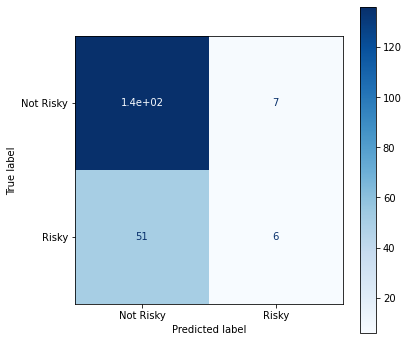

In [99]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_lgb, X_test_new, y_test, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

Text(0.5, 1.0, 'ROC Curve')

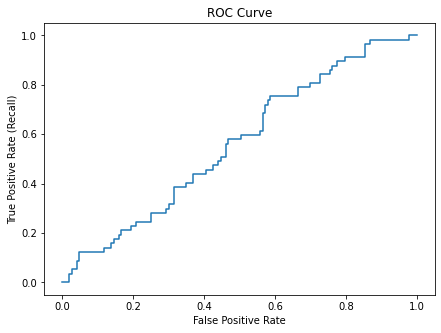

In [100]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, grid_lgb.predict_proba(X_test_new)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title('ROC Curve')

In [107]:
probs = Series(grid_lgb.predict_proba(X_test_new)[:,1])
rank = df['policy_number']
rank = pd.concat([rank,probs],axis=1)
rank_test = rank.rename(columns={0 : "PROBABILITY"})
rank_test = rank_test.sort_values(by='PROBABILITY', ascending=False)
rank_test = rank_test.set_index(Series([x for x in range(1,len(rank)+1)])).head(200)
rank_test

,policy_number,PROBABILITY
1,914815,0.728333
2,731450,0.665798
3,429027,0.646946
4,485665,0.636589
5,517240,0.608872
...,...,...
196,456604,0.075729
197,842643,0.075499
198,686816,0.071602
199,203914,0.071412
